# Overview (Essay)

In this analysis, we aim to predict the number of wine cases sold, labeled as out `TARGET` variable, using different properties of the wine such as acidity, sugar levels, and other chemical properties in wine. By using machine learning algorithms, we want to identify the leading indicators that impact wine sales and accuractely forecast wine cases sold. This dataset has 12795 obersvations and 15 columns: 14 features and 1 target variable.

We began our analysis by exploring and processing the dataset. Initially, we loaded the dataset from its csv file and examined its shape, paying close attention to any missing values and outliers. We found that several features had significant missing values, including `ResidualSugar`, `Chlorides`, `FreeSulfurDioxide`, `TotalSulfurDioxide` and `Sulphate`. To handle the missing values, we used different imputation methods. For `ResidualSugar`, `Chlorides`, `FreeSulfurDioxide`, `TotalSulfurDioxide`, and `Sulphates` columns, we used the zero imputation where we filled NA values with zeroes because during the EDA process we found that the distributions of these features had a mean of near zero which told us that using zero imputation would minimize the impact of the imputation. Similar process was used for the columns, where for `pH` and `Alcohol`, we applied a median imputaion due to the skewness of their distribution. Lastly, mode imputation was used for the `STARS` rating because it is a categorical feature. Moveover, we did consider removing `STARS` due to its high percentage of miss ngnes but it resulted in our models performing worse thus we kept and applied imputation instead. After all of the imputations, we then moved on to standardizing the data to ensure all of the features were on the same scale, which can impact the performance of some ML algorithms that are sensitive to feature scaling.

Next, we conducted more EDA to discover and better understand the data. This EDA including creating boxplots and histograms to visualize the distributions and possible outliers and generated a correlation matrix in order to identify the relationships between feature. The boxplot was helful in displaying the variability and outliers. The correlation matrix indicated that the feature a mainly independent of each other. After the EDA, we proceeded with data preprocessing, which involved splitting the dataset into training and testing sets with a 75-25 split. This split allowed us to train our models on a portion of the data while keeping a separate set for evaluating the models' performance. We implemented several models to predict the `TARGET` variable, including the Support Vector Machine (SVR), Random Forest Regressor, XGBooost Regressor, and a Simple Neural Network. We wanted to use models that differ in approah. The SVR uses a hyperplane to separate data points where it relies on the anchor points to make the decision so we were not concern with outliers in this case. The random forest regressor approach of the bagging techniques to create an ensemble of decision trees. If we use the bagged method, then we also want to use boosting here we used XGBoost. Lasly, the simple neural network leverages deep learning capabilities for this regression task.

To optimize the perfomance of each model, we utilized GridSearchCV for hyperparameter tuning.  For the Support Vector Machine, we tuned the kernel, C, and epsilon parameters. The Random Forest model's hyperparameters included the number of estimators, max depth, min samples split, and min samples leaf. XGBoost's parameters included the number of estimators, max depth, learning rate, subsample, colsample_bytree, gamma, reg_alpha, and reg_lambda. For the Simple Neural Network, we adjusted the number of layers, the number of neurons in each layer, and the dropout rate.

After tuning the models, we evaluated them using Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE). We used these evaluation metrics to measure how well each model performed on the testing data. The Support Vector Machine got an MSE of 2.658, an RMSE of 1.630, and an MAE of 1.208. The Random Forest model performed slightly better with an MSE of 2.281, an RMSE of 1.510, and an MAE of 1.181. XGBoost outperformed both with an MSE of 2.217, an RMSE of 1.489, and an MAE of 1.166. The Simple Neural Network got an MSE of 2.514, an RMSE of 1.585, and an MAE of 1.234. From this, we found that XGBoost was our best performing model. Beforehand, we expected to the neural network to outperform the other model but to our surprise it the worse performing. We suspect that this may be due to the lack of thorough hypertuning. We did try a number of different epochs with 200 being the best out of the manual trials. Moreover, we didnt want to increase the epochs drastically since it increases the risk of overfitting.

From our analysis, we found that `STARS`, `LabelAppeal`, and `AcidIndex` are the most influencial features to wine sales. These features consistently emerged as the most significant predictors in our models. By focusing on these variables, we can better understand what drives wine sales and develop strategies to enhance them. Evidently, customers heavily depend on the wine's star rating reviews. In order to increase sales, we suggest improvement our wines overall star rating meaning the higher the star rating a wine is given the more wine cases are sold. Another significant feature was the wine label, thus we suggest focusing on the design of the label to attract more customers. 

In conclusion, this analysis has shown that properly preprocessing the data, we can build predictive models for study the forecast of wine sales. Our findings on the feature importance of `STARS`. `LabelAppeal` and `AcidIndex` are leading indicators to actionable improvements for the production and marketing teams to improve the companies overall wine sales. 

# Implementation

## Exploratory Data Analysis

In [66]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

plt.rcParams['figure.figsize'] = (10, 8)

In [67]:
data = pd.read_csv('wine-training-data.csv').drop('INDEX', axis =1)
data.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [68]:
X = data.drop('TARGET', axis=1)
y = data[['TARGET']]

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TARGET              12795 non-null  int64  
 1   FixedAcidity        12795 non-null  float64
 2   VolatileAcidity     12795 non-null  float64
 3   CitricAcid          12795 non-null  float64
 4   ResidualSugar       12179 non-null  float64
 5   Chlorides           12157 non-null  float64
 6   FreeSulfurDioxide   12148 non-null  float64
 7   TotalSulfurDioxide  12113 non-null  float64
 8   Density             12795 non-null  float64
 9   pH                  12400 non-null  float64
 10  Sulphates           11585 non-null  float64
 11  Alcohol             12142 non-null  float64
 12  LabelAppeal         12795 non-null  int64  
 13  AcidIndex           12795 non-null  int64  
 14  STARS               9436 non-null   float64
dtypes: float64(12), int64(3)
memory usage: 1.5 MB


In [70]:
data.shape

(12795, 15)

In [71]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,12795.0,3.029074,1.926368,0.00000,2.00000,3.00000,4.000000,8.00000
FixedAcidity,12795.0,7.075717,6.317643,-18.10000,5.20000,6.90000,9.500000,34.40000
VolatileAcidity,12795.0,0.324104,0.784014,-2.79000,0.13000,0.28000,0.640000,3.68000
CitricAcid,12795.0,0.308413,0.862080,-3.24000,0.03000,0.31000,0.580000,3.86000
ResidualSugar,12179.0,5.418733,33.749379,-127.80000,-2.00000,3.90000,15.900000,141.15000
Chlorides,12157.0,0.054822,0.318467,-1.17100,-0.03100,0.04600,0.153000,1.35100
FreeSulfurDioxide,12148.0,30.845571,148.714558,-555.00000,0.00000,30.00000,70.000000,623.00000
TotalSulfurDioxide,12113.0,120.714233,231.913211,-823.00000,27.00000,123.00000,208.000000,1057.00000
Density,12795.0,0.994203,0.026538,0.88809,0.98772,0.99449,1.000515,1.09924
pH,12400.0,3.207628,0.679687,0.48000,2.96000,3.20000,3.470000,6.13000


### Missingness

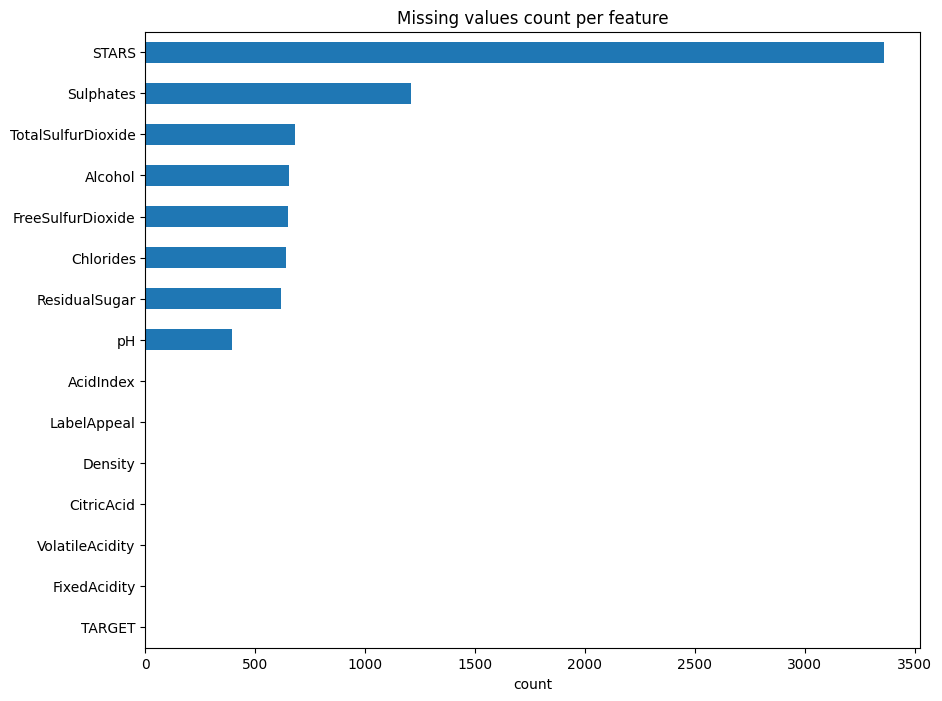

In [72]:
data.isna().sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Missing values count per feature')
plt.xlabel('count')
plt.show()

### Boxplots

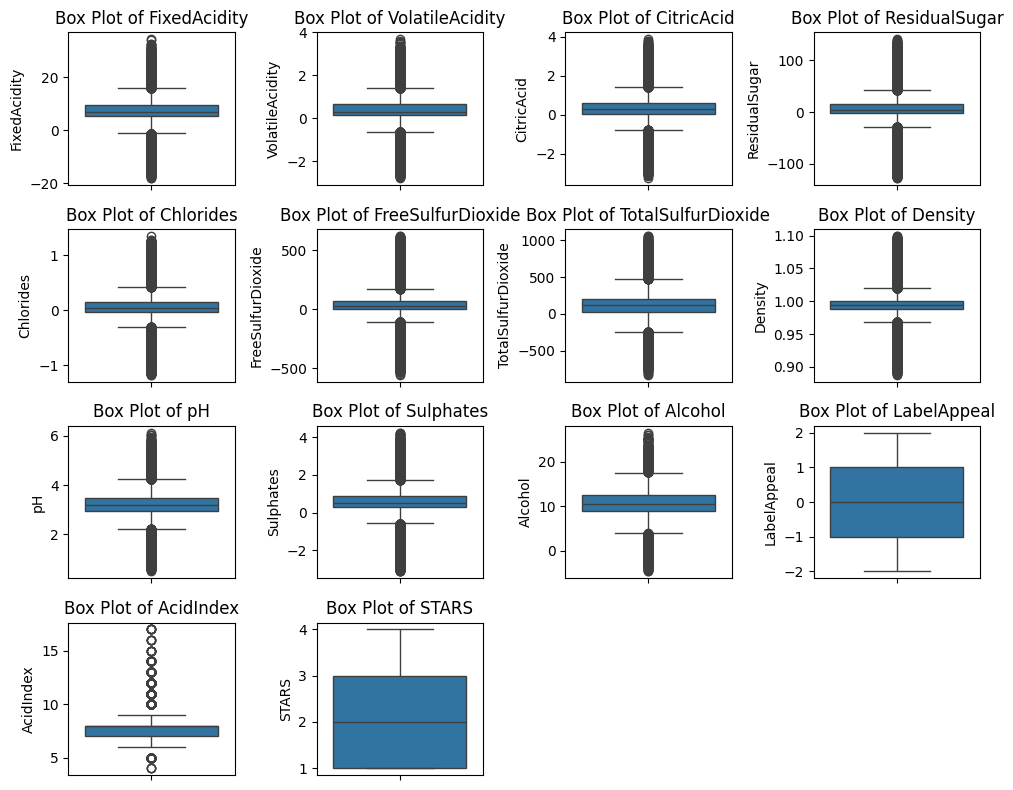

In [73]:
for i, column in enumerate(X, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=X[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

###  Data Distribution

### Correlation Matrix

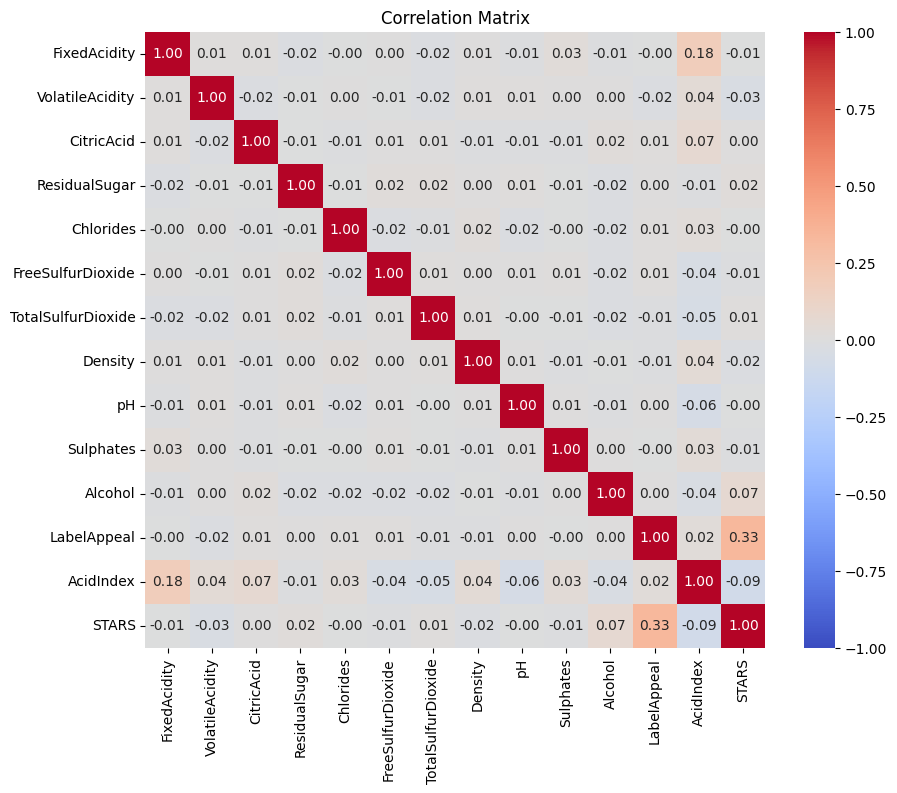

In [74]:
correlation_matrix = X.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Data Preprocessing

### Handle Missingness

In [75]:
X.isna().sum()

FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64

In [76]:
# impute with zero
zero_cols = ['ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Sulphates']

# impute with median
median_cols = ['pH', 'Alcohol']

# impute with mode 
mode_cols = ['STARS']

In [77]:
for col in zero_cols:
   X[col].fillna(0, inplace=True)

for col in median_cols:
   X[col].fillna(X[col].median(), inplace=True)
   
X['STARS'].fillna(X['STARS'].mode()[0], inplace=True)

In [78]:
X.isna().sum()

FixedAcidity          0
VolatileAcidity       0
CitricAcid            0
ResidualSugar         0
Chlorides             0
FreeSulfurDioxide     0
TotalSulfurDioxide    0
Density               0
pH                    0
Sulphates             0
Alcohol               0
LabelAppeal           0
AcidIndex             0
STARS                 0
dtype: int64

### Standard Scale

In [79]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_preproc = pd.DataFrame(X_scaled, columns=X.columns)

X_preproc.describe().T

,count,mean,std,min,25%,50%,75%,max
FixedAcidity,12795.0,1.117598e-16,1.000039,-3.985141,-0.296913,-0.027815,0.383747,4.325244
VolatileAcidity,12795.0,3.887299e-18,1.000039,-3.972154,-0.247587,-0.056256,0.402937,4.280569
CitricAcid,12795.0,1.443854e-17,1.000039,-4.116268,-0.322967,0.001841,0.315050,4.119951
ResidualSugar,12795.0,1.693752e-17,1.000039,-4.035627,-0.156555,-0.068532,0.295700,4.127726
Chlorides,12795.0,6.663941e-18,1.000039,-3.937289,-0.167681,-0.026039,0.244368,4.181371
FreeSulfurDioxide,12795.0,-7.496934e-18,1.000039,-4.027964,-0.201891,-0.008864,0.239314,4.092961
TotalSulfurDioxide,12795.0,-2.721109e-17,1.000039,-4.124224,-0.498455,0.011969,0.368386,4.148162
Density,12795.0,3.233122e-15,1.000039,-3.998729,-0.244293,0.010826,0.237871,3.958203
pH,12795.0,-4.198283e-16,1.000039,-4.076286,-0.354801,-0.011049,0.362594,4.368048
Sulphates,12795.0,-3.942832e-17,1.000039,-4.007030,-0.530155,-0.008069,0.325178,4.179733


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_preproc, y, test_size=0.25, random_state=123, shuffle=True)

## Model Building

### Support Vector Machine 

In [81]:
svr = SVR()

param_grid = {
   'kernel': ['linear', 'poly', 'rbf'],
   'C': [0.1, 1, 10],
   'epsilon': [0.1, 0.2, 0.3]
}

grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1) # complete: 2 mins

grid_search.fit(X_train, y_train)

best_svr_params = grid_search.best_params_
best_svr_model = grid_search.best_estimator_

print("Best Parameters:", best_svr_params)

c:\Users\nickc\DataScience\NickAMC.github.io\ds_env\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters: {'C': 1, 'epsilon': 0.3, 'kernel': 'rbf'}


In [82]:
svr_preds = best_svr_model.predict(X_test)

### Random Forest

In [83]:
rf_param = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=123)

rf_grid = GridSearchCV(estimator=rf, param_grid=rf_param, cv=3, scoring='neg_mean_squared_error', n_jobs=-1) # complete: 7mins 

rf_grid.fit(X_train, y_train)

best_rf_params = rf_grid.best_params_
best_rf_model = rf_grid.best_estimator_

print("Best Parameters:", best_rf_params)

c:\Users\nickc\DataScience\NickAMC.github.io\ds_env\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}

In [84]:
rf_preds = best_rf_model.predict(X_test)

### XGBoost

In [85]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.1, 0.3, 0.5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

xgb = XGBRegressor(random_state=123)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1) # complete: 14mins

grid_search.fit(X_train, y_train)

best_xgb_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

print("Best Parameters:", best_xgb_params)

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 1.5, 'subsample': 1.0}


In [86]:
xgb_preds = best_xgb_model.predict(X_test)

### Simple Neural Network

In [87]:
import torch
import torch
import torch.nn as nn
import torch.optim as optim

In [88]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [89]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 64)
        self.layer3 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.dropout(x)
        x = self.relu(self.layer2(x))
        x = self.dropout(x)
        x = self.layer3(x)
        return x

In [90]:
input_dim = X_train_tensor.shape[1]
model = NeuralNetwork(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 200
batch_size = 32

train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [91]:
for epoch in range(num_epochs):
    model.train()
    for i, (inputs, targets) in enumerate(train_loader):
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/200], Loss: 2.9414
Epoch [20/200], Loss: 1.9786
Epoch [30/200], Loss: 3.1680
Epoch [40/200], Loss: 2.6550
Epoch [50/200], Loss: 1.7019
Epoch [60/200], Loss: 2.3943
Epoch [70/200], Loss: 1.8342
Epoch [80/200], Loss: 2.6538
Epoch [90/200], Loss: 2.7670
Epoch [100/200], Loss: 2.0573
Epoch [110/200], Loss: 2.6068
Epoch [120/200], Loss: 1.6437
Epoch [130/200], Loss: 2.7924
Epoch [140/200], Loss: 2.1340
Epoch [150/200], Loss: 1.9290
Epoch [160/200], Loss: 1.9835
Epoch [170/200], Loss: 2.4833
Epoch [180/200], Loss: 2.5838
Epoch [190/200], Loss: 1.5983
Epoch [200/200], Loss: 2.4856


In [92]:
model.eval()
with torch.no_grad():
    snn_preds = model(X_test_tensor)

## Model Evaluation and Selection

In [93]:
# SVR metrics
svr_mse = mean_squared_error(y_test, svr_preds)
svr_rmse = svr_mse ** 0.5
svr_mae = mean_absolute_error(y_test,svr_preds)

# rf metrics
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = rf_mse ** 0.5
rf_mae = mean_absolute_error(y_test, rf_preds)
# xgb metrics 

xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_rmse = xgb_mse ** 0.5
xgb_mae = mean_absolute_error(y_test, xgb_preds)

# Simple Neural Network
snn_mse = mean_squared_error(y_test_tensor.numpy(), snn_preds.numpy())
snn_rmse = snn_mse ** 0.5
snn_mae = mean_absolute_error(y_test_tensor.numpy(), snn_preds.numpy())

In [94]:
metrics_data = {
    'Model': ['Support Vector Machine', 'Random Forest', 'XGBoost', 'Simple Neural Network'],
    'MSE': [svr_mse, rf_mse, xgb_mse, snn_mse],
    'RMSE': [svr_rmse, rf_rmse, xgb_rmse, snn_rmse],
    'MAE': [svr_mae, rf_mae, xgb_mae, snn_mae]
}

metrics_df = pd.DataFrame(metrics_data)

metrics_df

,Model,MSE,RMSE,MAE
0,Support Vector Machine,2.658043,1.630351,1.208471
1,Random Forest,2.281095,1.510329,1.181383
2,XGBoost,2.216882,1.488920,1.165807
3,Simple Neural Network,2.573219,1.604126,1.239551


In [95]:
# rf feature importance
rf_importances = best_rf_model.feature_importances_
rf_feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_importances}).sort_values(by='Importance', ascending=False)

# xgb feature importance
xgb_importances = best_xgb_model.feature_importances_
xgb_feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb_importances}).sort_values(by='Importance', ascending=False)

In [96]:
rf_feature_importance

,Feature,Importance
13,STARS,0.379291
11,LabelAppeal,0.131541
12,AcidIndex,0.082383
6,TotalSulfurDioxide,0.051210
4,Chlorides,0.046437
1,VolatileAcidity,0.045380
7,Density,0.038382
5,FreeSulfurDioxide,0.037885
8,pH,0.036243
2,CitricAcid,0.034267


In [97]:
xgb_feature_importance

,Feature,Importance
13,STARS,0.527032
12,AcidIndex,0.125381
11,LabelAppeal,0.111037
4,Chlorides,0.037516
6,TotalSulfurDioxide,0.037068
1,VolatileAcidity,0.030486
5,FreeSulfurDioxide,0.024638
2,CitricAcid,0.022089
3,ResidualSugar,0.021196
7,Density,0.018723
